# Spin-polarised current driven skyrmion

**Author**: Marijan Beg

**Date**: 29 Apr 2016

In this tutorial, a single magnetic skyrmion is driven by a spin-polarised current.

Firstly, we define a function which will be subsequently used for plotting the z component of magnetisation.

In [81]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_magnetisation(m):
    m.shape = (-1, 3)
    mx = m[:, 0]
    my = m[:, 1]
    mz = m[:, 2]
    mx.shape = (b, a)
    my.shape = (b, a)
    mz.shape = (b, a)
    
    extent = [0, a, 0, b]
    plt.figure(figsize=(8, 4))
    plt.imshow(mz, extent=extent)
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.title('mz')

Now, we create a finite difference mesh.

In [82]:
from fidimag.micro import Sim
from fidimag.common import CuboidMesh
from fidimag.micro import Zeeman, Demag, DMI, UniformExchange

a = 60  # nm
b = 25  # nm

dx = dy = dz = 2  # nm

mesh = CuboidMesh(nx=a, ny=b, nz=1, dx=dx, dy=dy, dz=dz, unit_length=1e-9, periodicity=(True, False, False))

We create a simulation object that contains uniform exchange, DMI, and Zeeman energy contributions.

In [83]:
Ms = 1e6  # magnetisation saturation (A/m)
A = 13e-11  # exchange stiffness (J/m)
D = 5e-2  # DMI constant (J/m**2)
H = (0, 0, 5e6)  # external magnetic field (A/m)
alpha = 0.5  # Gilbert damping
gamma = 2.211e5  # gyromagnetic ratio (m/As)

sim  = Sim(mesh)  # create simulation object

# Set parameters.
sim.Ms = Ms
sim.alpha = alpha
sim.gamma = gamma

# Add energies.
sim.add(UniformExchange(A=A))
sim.add(DMI(D))
sim.add(Zeeman(H))

	No data defined


In order to get a skyrmion as a relaxed state, we need to initialise the system in an appropriate way. For that, we use the following function, and plot the initial state.

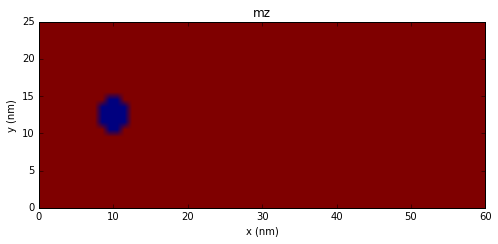

In [84]:
def m_initial(coord):
    # Extract x and y coordinates.
    x = coord[0]
    y = coord[1]
    
    # The centre of the circle
    x_centre = a/3.
    y_centre = b
    
    # Compute the circle radius.
    r = ((x-x_centre)**2 + (y-y_centre)**2)**0.5
    
    if r < 5:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    
sim.set_m(m_initial)
plot_magnetisation(np.copy(sim.spin))

Now, we can relax the system, save and plot the relaxed state.

In [85]:
%%capture
sim.relax(dt=1e-13, stopping_dmdt=0.1, max_steps=5000, save_m_steps=None, save_vtk_steps=None)

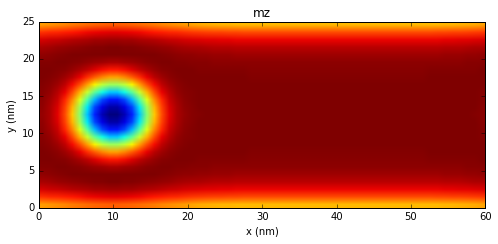

In [86]:
plot_magnetisation(np.copy(sim.spin))
np.save('m0.npy', sim.spin)

Using the obtained relaxed state, we create a new smulation object and specify the driver to be 'llg_stt'. By applying a spin-polarised current of $J = 1 \times 10^{12} \,\text{A/m}^{2}$ in the $x$ directions with $\beta = 1$, we move a skyrmion in the simulated sample.

	No data defined


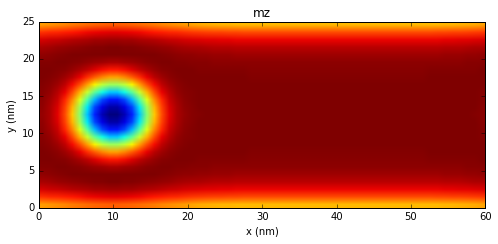

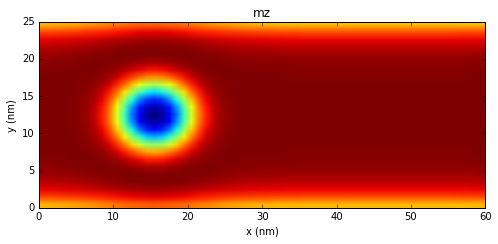

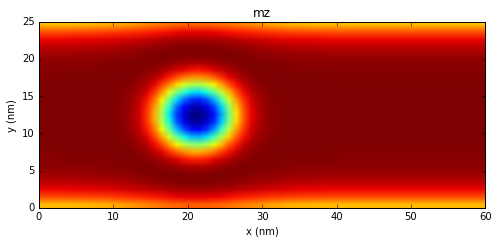

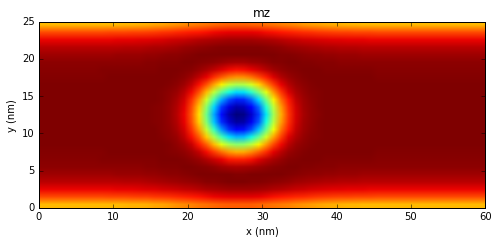

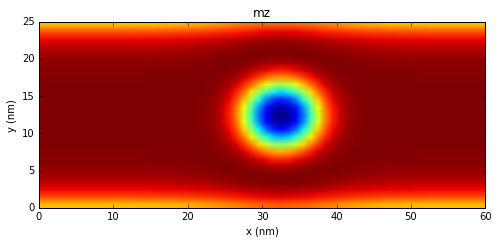

In [87]:
sim2  = Sim(mesh, driver='llg_stt')  # create simulation object

# Set parameters.
sim2.Ms = Ms
sim2.alpha = alpha
sim2.gamma = gamma

# Add energies.
sim2.add(UniformExchange(A=A))
sim2.add(DMI(D))
sim2.add(Zeeman(H))

sim2.jx = -1e12
sim2.beta = 1

sim2.set_m(np.load('m0.npy'))

t_array = np.arange(0, 1e-9, 0.2e-9)
for t in t_array:
    sim2.run_until(t)
    plot_magnetisation(np.copy(sim2.spin))